Tutorial: https://jef.works/STalign/notebooks/merfish-merfish-alignment.html

In [2]:
## import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import plotly
import requests
import os
import STalign

# make plots bigger
plt.rcParams["figure.figsize"] = (12,10)

In [1]:
import jupyterlab_server
print(jupyterlab_server.__version__)
import requests
print(requests.__version__)

2.28.0
2.32.5


In [3]:
from STalign import STalign

AttributeError: module 'numpy' has no attribute 'bool8'

In [6]:
os.getcwd()

'/Users/iriskwon/Library/CloudStorage/OneDrive-SharedLibraries-JohnsHopkins/Manjari Anant - Iris/stalign_gene_expression/Iris'

In [4]:
#change dir to get data from the cloned repo 
os.chdir('/Users/iriskwon/Library/CloudStorage/OneDrive-SharedLibraries-JohnsHopkins/Manjari Anant - Iris/stalign_gene_expression')

In [5]:
# Single cell data 1 (img I)
# read in data 
fname = 'STalign/docs/merfish_data/datasets_mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate3_cell_metadata_S2R3.csv.gz'
df1 = pd.read_csv(fname)
print(df1.head())

                                Unnamed: 0  fov       volume    center_x  \
0  158338042824236264719696604356349910479   33   532.778772  617.916619   
1  260594727341160372355976405428092853003   33  1004.430016  596.808018   
2  307643940700812339199503248604719950662   33  1267.183208  578.880018   
3   30863303465976316429997331474071348973   33  1403.401822  572.616017   
4  313162718584097621688679244357302162401   33   507.949497  608.364018   

      center_y       min_x       max_x        min_y        max_y  
0  2666.520010  614.725219  621.108019  2657.545209  2675.494810  
1  2763.450012  589.669218  603.946818  2757.013212  2769.886812  
2  2748.978012  570.877217  586.882818  2740.489211  2757.466812  
3  2766.690012  564.937217  580.294818  2756.581212  2776.798812  
4  2687.418010  603.061218  613.666818  2682.493210  2692.342810  


In [8]:
df = pd.read_csv('/Users/iriskwon/Library/CloudStorage/OneDrive-SharedLibraries-JohnsHopkins/Manjari Anant - Iris/stalign_gene_expression/STalign/docs/merfish_data/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_metadata_S1R1.csv.gz')

In [9]:
df

Unnamed: 0   fov       volume  \
0      110883424764611924400221639916314253469     0   432.141425   
1      135188247894899244046039873973964001182     0  1351.802616   
2      164766962839370328502017156371562646881     0  1080.653268   
3      165747897693809971960756442245389760838     0  1652.000749   
4      260943245639750847364278545493286724628     0  1343.378642   
...                                        ...   ...          ...   
78324  165273009496786595275688065919008183969  1225  1159.623218   
78325  250474226357477911702383283537224741401  1225  1058.062257   
78326   66106840181174834341279408890707577820  1225  1155.306779   
78327   66165211106933093510165165316573672348  1225   394.808108   
78328   71051447268015582817266088343399517927  1225   798.608811   

          center_x     center_y        min_x        max_x        min_y  \
0       156.563284  4271.326432   151.530484   161.596084  4264.619632   
1       156.509284  4256.962431   148.290484   164.728084  4247.663631   
2       159.965284  4228.180431   152.178484   167.752084  4220.555630   
3       167.579284  4323.868433   158.226484   176.932084  4314.191633   
4       160.559284  4308.802433   152.394484   168.724084  4301.231633   
...            ...          ...          ...          ...          ...   
78324  9154.007886  4445.528506  9143.953086  9164.062686  4435.473706   
78325  9088.829884  4423.712505  9081.097084  9096.562685  4416.249705   
78326  9170.261887  4431.758506  9159.613086  9180.910687  4421.217705   
78327  9086.183884  4417.016505  9081.745084  9090.622685  4412.253705   
78328  9073.169884  4419.770505  9065.005084  9081.334684  4414.521705   

             max_y  
0      4278.033232  
1      4266.261232  
2      4235.805231  
3      4333.545233  
4      4316.373233  
...            ...  
78324  4455.583306  
78325  4431.175306  
78326  4442.299306  
78327  4421.779305  
78328  4425.019305  

[78329 rows x 9 columns]

Single-cell centroid coords are in microns. 

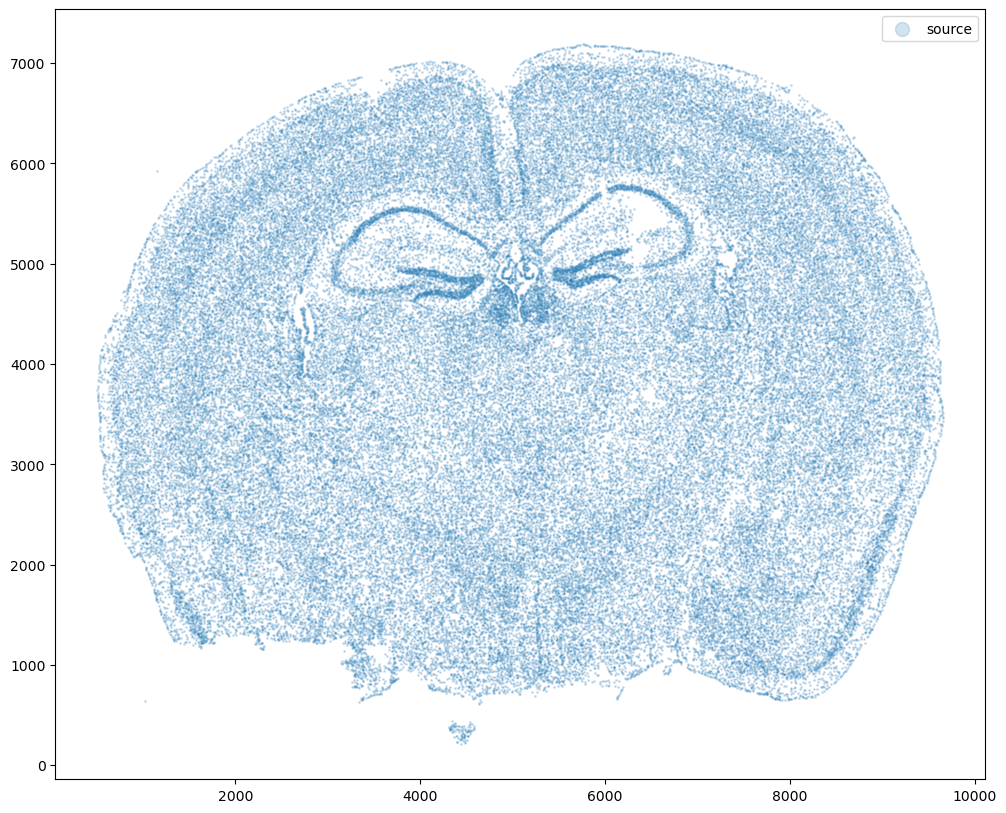

In [10]:
# STalign only needs cell centroid info, pull this 
xI = np.array(df1['center_x'])
yI = np.array(df1['center_y'])

# Plot 
fig,ax=plt.subplots()
ax.scatter(xI, yI, s=1,alpha=0.2, label='source')
ax.legend(markerscale=10)

In [ ]:
# Single cell data 2 (img J)
# read in data 
fname = 'STalign/docs/merfish_data/datasets_mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate2_cell_metadata_S2R2.csv.gz'
df2 = pd.read_csv(fname)
print(df2.head())

                                Unnamed: 0  fov       volume    center_x   
0  100442548580636641738686294721955425236   30   795.990359  594.918018  \
1  122772418713922597206543113913693416569   30  1499.185428  576.450018   
2   16937832242667722486734012495480970988   30   438.866712  564.462017   
3  174945714711592495197228308697299834282   30   677.998204  538.164017   
4  188895260965823935327150012855065409227   30  1144.061050  610.362018   

      center_y       min_x       max_x        min_y        max_y  
0  5628.150243  589.021218  600.814818  5620.093443  5636.207043  
1  5762.286246  569.365217  583.534818  5749.909446  5774.663047  
2  5721.624245  559.429217  569.494817  5716.429445  5726.819045  
3  5605.475642  532.753216  543.574817  5600.448242  5610.503042  
4  5652.936244  603.709218  617.014819  5641.369443  5664.503044  


In [15]:
# get cell centroids 
xJ = np.array(df2['center_x'])
yJ = np.array(df2['center_y'])

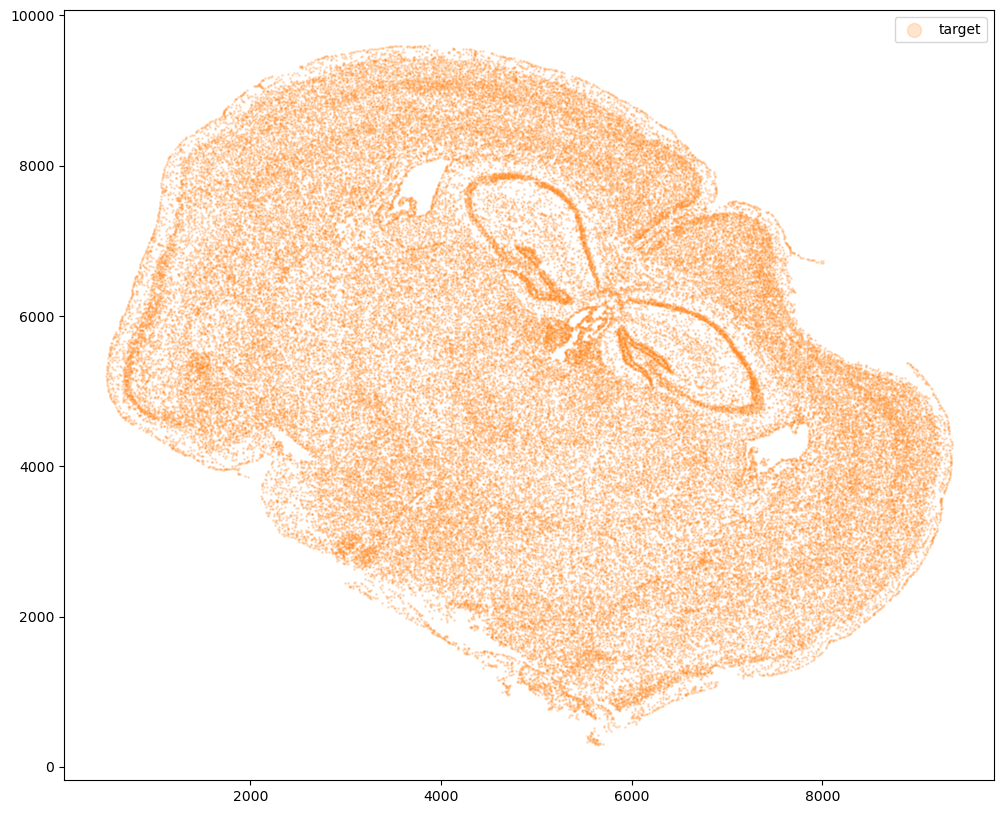

In [19]:
# plot 
fig,ax = plt.subplots()
ax.scatter(xJ, yJ, s=1, alpha=0.2, c='#ff7f0e', label='target')
ax.legend(markerscale=10)

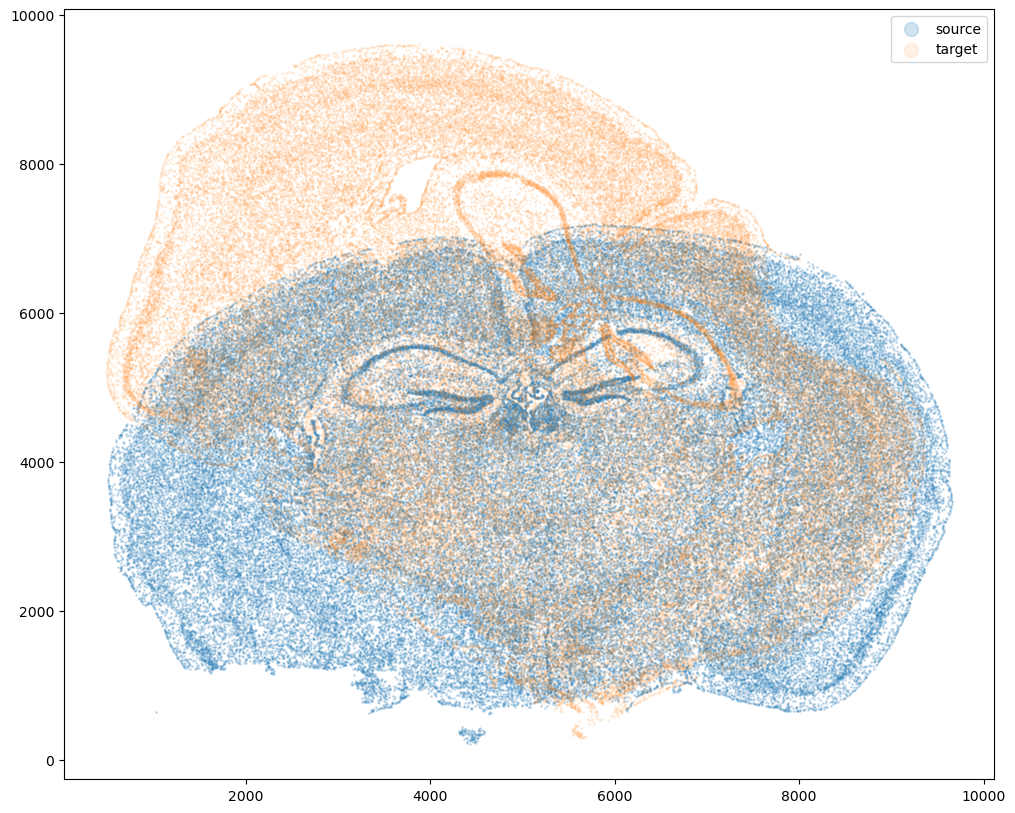

In [20]:
# plot 
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2, label='source')
ax.scatter(xJ,yJ,s=1,alpha=0.1, label= 'target')
ax.legend(markerscale = 10)

STalign relies on interactive gradient descent to align these two images. Performs better if the source and target are initially at a similar angle. 

Change the rotation angle `theta_deg` until similar visually. 
Rotation is defined in degrees and in clockwise direction. 

In [36]:
A = np.array([xI, yI])

In [42]:
A.shape

(2, 85958)

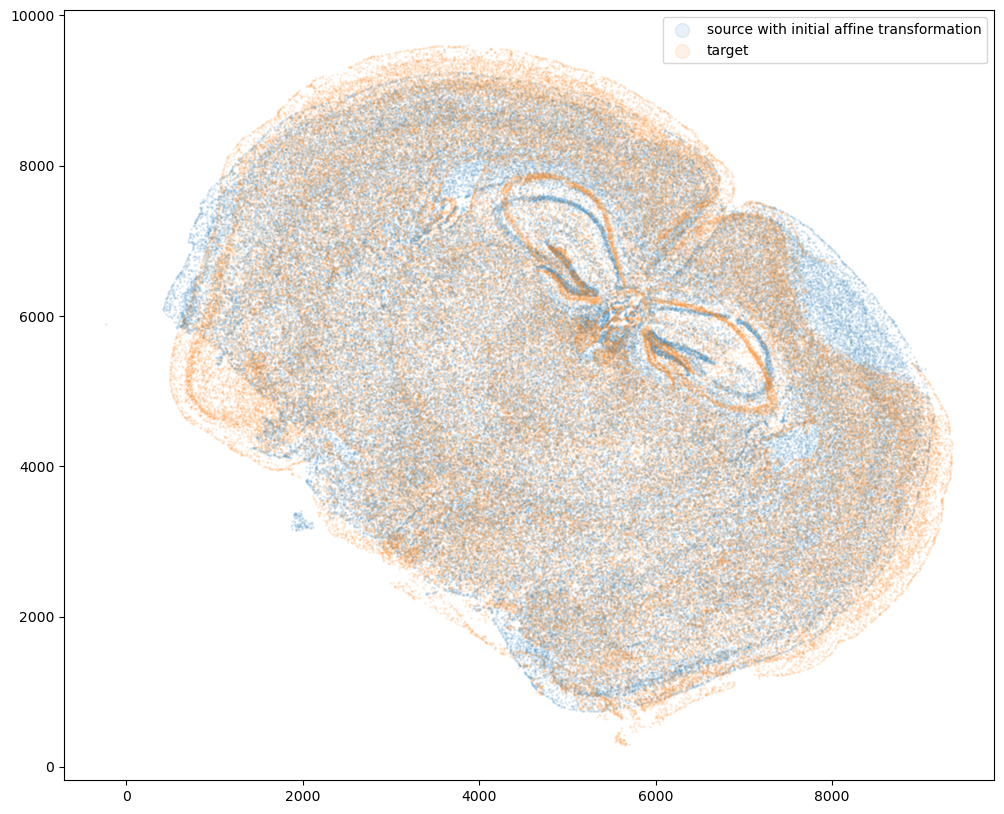

In [ ]:
theta_deg = 45 
theta0 = (np.pi/180)*(-theta_deg) # convert theta to radians 

# rotation matrix, rotates around origin 
L = np.array([[np.cos(theta0), -np.sin(theta0)],
              [np.sin(theta0), np.cos(theta0)]])

# source image after rotating
source_L = np.matmul(L , np.array([xI, yI])) 
# source_L_v2 = L @ np.array([xI, yI])
# np.testing.assert_allclose(source_L, source_L_v2)

# define xI and yI after rotating 
xI_L = source_L[0]
yI_L = source_L[1]

#translation matrix
#effectively makes the rotation about the centroid of I (i.e the means of xI and yI])
#and also moves the centroid of I to the centroid of J
T = np.array([ np.mean(xI)- np.cos(theta0)*np.mean(xI) +np.sin(theta0)*np.mean(yI) - (np.mean(xI)-np.mean(xJ)),
              np.mean(yI)- np.sin(theta0)*np.mean(xI) -np.cos(theta0)*np.mean(yI) - (np.mean(yI)-np.mean(yJ))])

xI_L_T = xI_L + T[0]
yI_L_T = yI_L + T[1]

fig,ax = plt.subplots()
ax.scatter(xI_L_T,yI_L_T,s=1,alpha=0.1, label='source with initial affine transformation')
ax.scatter(xJ,yJ,s=1,alpha=0.1, label = 'target')
ax.legend(markerscale = 10)

Perform rasterizaton at a 30 micron resolution. 

0 of 85958
10000 of 85958
20000 of 85958
30000 of 85958
40000 of 85958
50000 of 85958
60000 of 85958
70000 of 85958
80000 of 85958
85957 of 85958


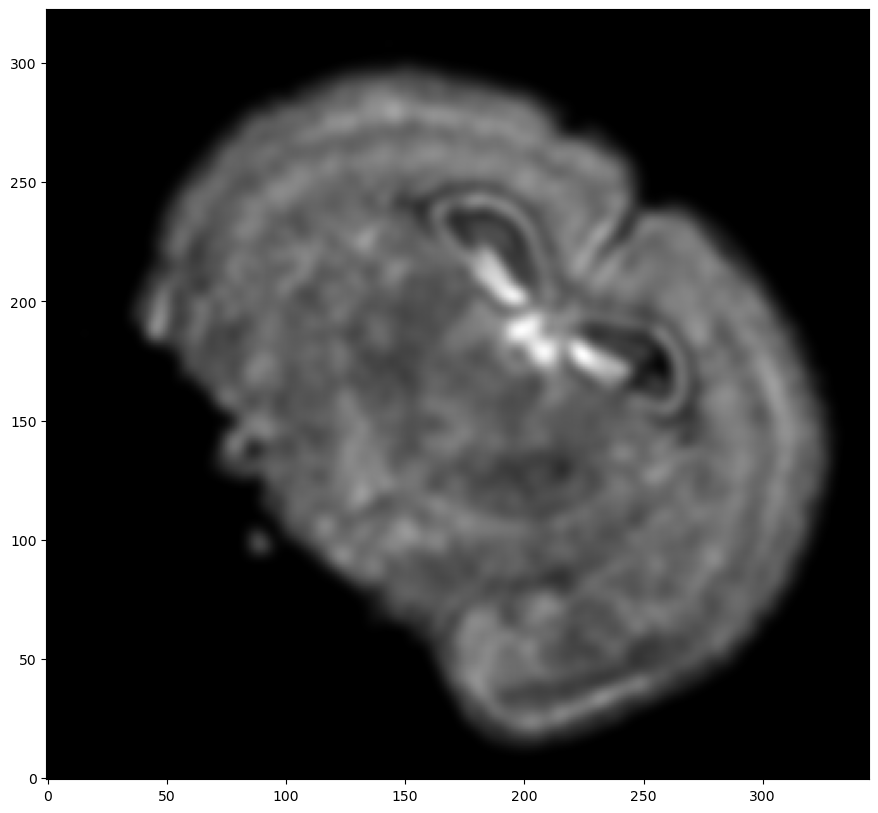

In [ ]:
# rasterize at 30um resolution (assuming positions are in um units) and plot
XI,YI,I,fig = STalign.rasterize(xI_L_T,yI_L_T,dx=30,blur=1.5)

# plot
ax = fig.axes[0]
ax.invert_yaxis() #have to invert y-axis to account for image typical orientation 

0 of 84172
10000 of 84172
20000 of 84172
30000 of 84172
40000 of 84172
50000 of 84172
60000 of 84172
70000 of 84172
80000 of 84172
84171 of 84172


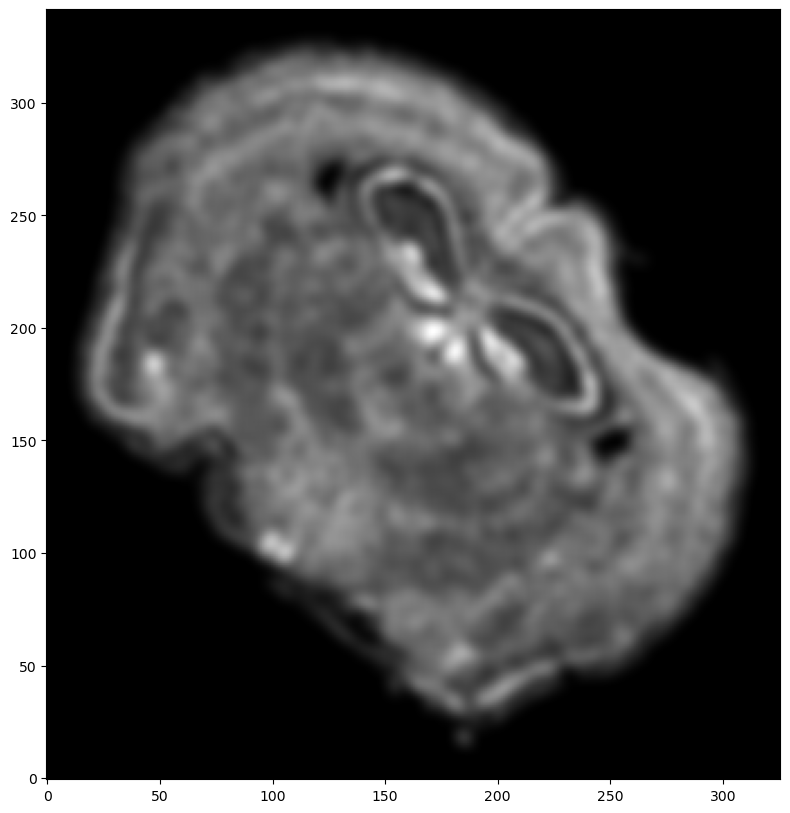

In [49]:
# rasterize the target image as well 
XJ, YJ, J, fig = STalign.rasterize(xJ, yJ, dx=30, blur=1.5)

# plot 
ax=fig.axes[0]
ax.invert_yaxis()

Text(0.5, 1.0, 'Rasterized Target Image, J')

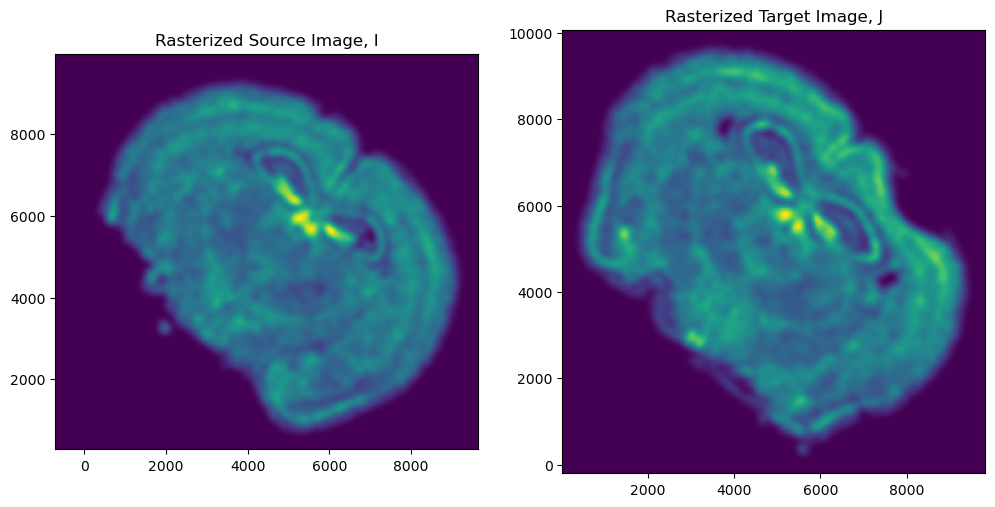

In [63]:
# plot rasterized images next to each other 
# get extent of images 
extentI = STalign.extent_from_x((YI,XI))
extentJ = STalign.extent_from_x((YJ,XJ))

# plot rasterized images 
fig,ax = plt.subplots(1,2)
ax[0].imshow(I[0], extent=extentI)
ax[1].imshow(J[0], extent=extentJ)
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].set_title("Rasterized Source Image, I")
ax[1].set_title("Rasterized Target Image, J")

# Custer in Scanpy (added Iris)

Perform alignment. 

/Users/iriskwon/miniforge3/envs/stalign-env/lib/python3.10/site-packages/STalign/STalign.py:1043: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  L = torch.tensor(L,device=device,dtype=dtype,requires_grad=True)
/Users/iriskwon/miniforge3/envs/stalign-env/lib/python3.10/site-packages/STalign/STalign.py:1044: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T = torch.tensor(T,device=device,dtype=dtype,requires_grad=True)
/Users/iriskwon/miniforge3/envs/stalign-env/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src

CPU times: user 13min 25s, sys: 4min 11s, total: 17min 36s
Wall time: 12min 44s


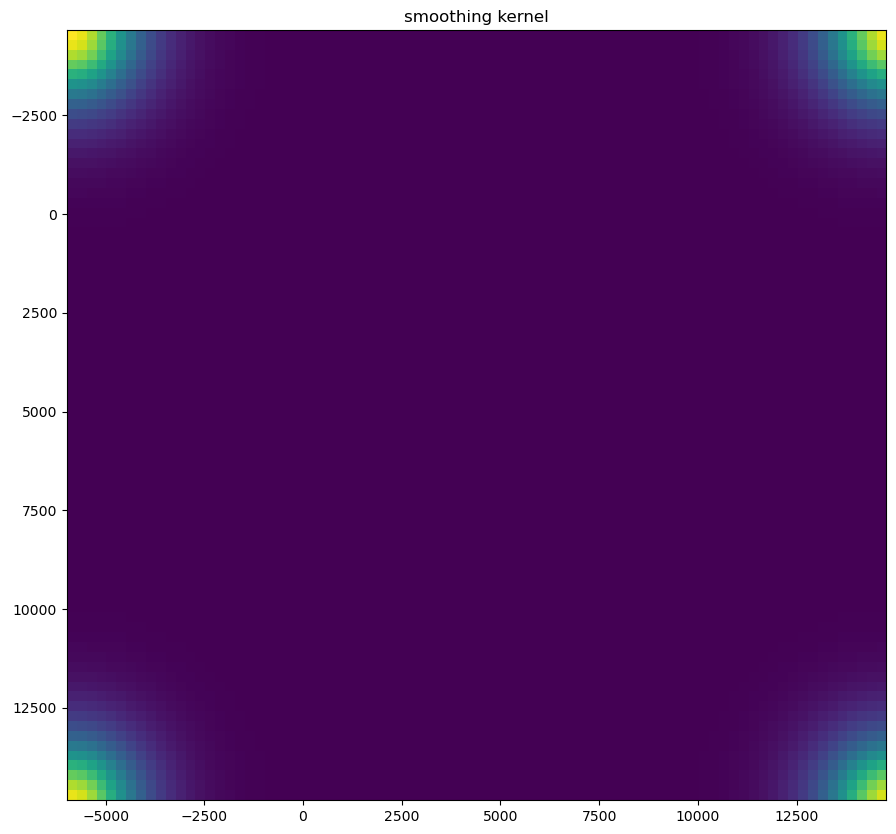

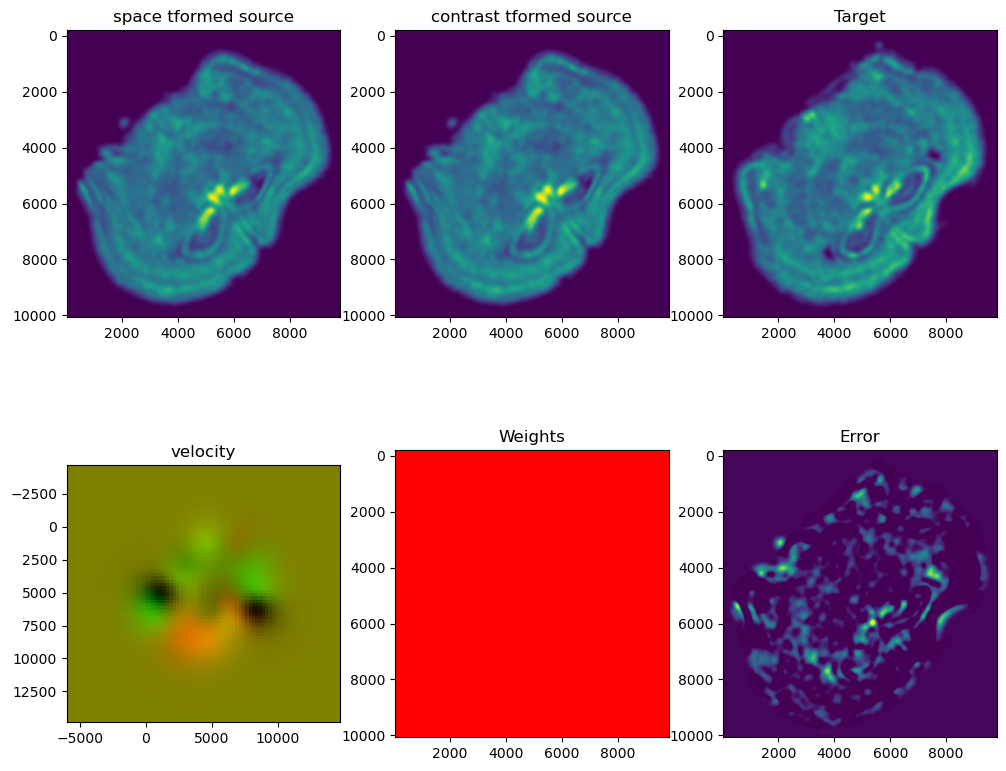

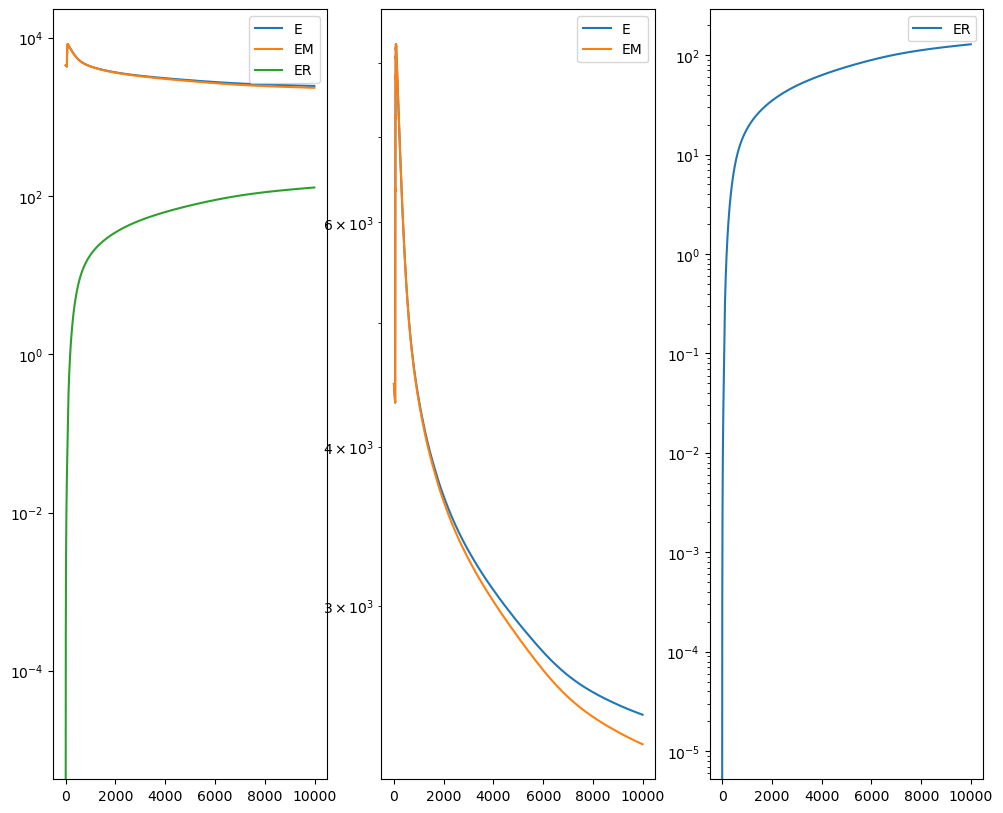

In [64]:
%%time
# run LDDMM
# specify device (default device for STalign.LDDMM is cpu)
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

# keep all other parameters default
params = {
            'niter': 10000,
            'device':device,
            'epV': 50
          }

out = STalign.LDDMM([YI,XI],I,[YJ,XJ],J,**params)

In [65]:
# get necessary output variables
A = out['A']
v = out['v']
xv = out['xv']

Plots generated throughout the alignment can be used to give you a sense of whether the parameter choices are appropriate and whether your alignment is converging on a solution. 

Evaluate the resulting alignment by applying the transformation to visualize how our source and target images were deformed to achieve the alignment: 

In [66]:
# set device for building tensors
if torch.cuda.is_available():
    torch.set_default_device('cuda:0')
else:
    torch.set_default_device('cpu')

/Users/iriskwon/miniforge3/envs/stalign-env/lib/python3.10/site-packages/torch/utils/_device.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


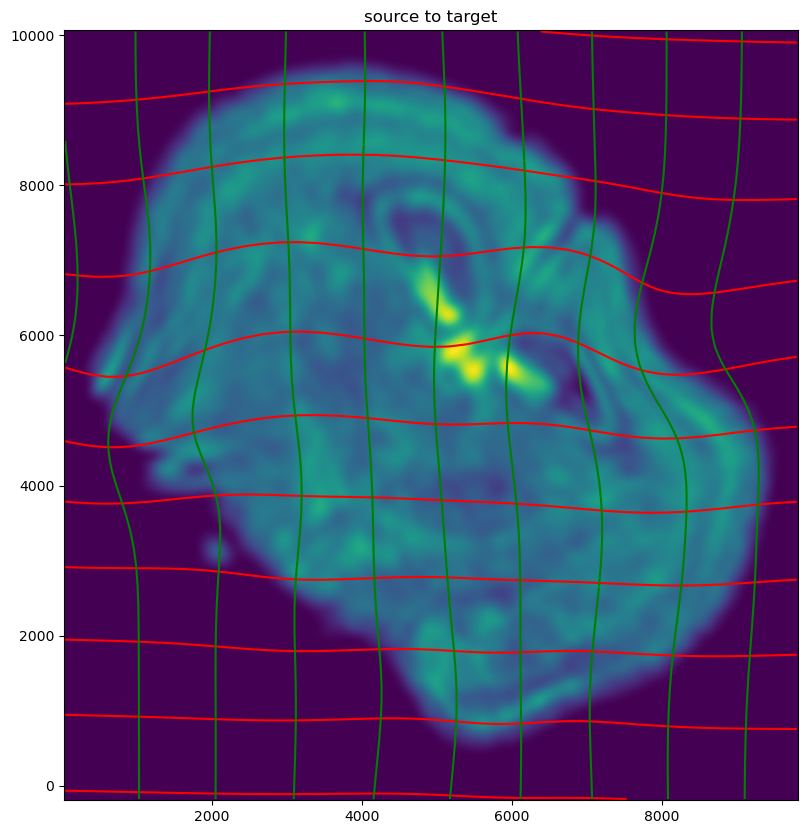

In [67]:
# apply transform
phii = STalign.build_transform(xv,v,A,XJ=[YJ,XJ],direction='b')
phiI = STalign.transform_image_source_to_target(xv,v,A,[YI,XI],I,[YJ,XJ])

#switch tensor from cuda to cpu for plotting with numpy
if phii.is_cuda:
    phii = phii.cpu()
if phiI.is_cuda:
    phiI = phiI.cpu()

# plot with grids
fig,ax = plt.subplots()
levels = np.arange(-100000,100000,1000)
ax.contour(XJ,YJ,phii[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XJ,YJ,phii[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('source to target')
ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ)
ax.invert_yaxis()

Since we use LDDMM, the resulting transformation is invertible. 

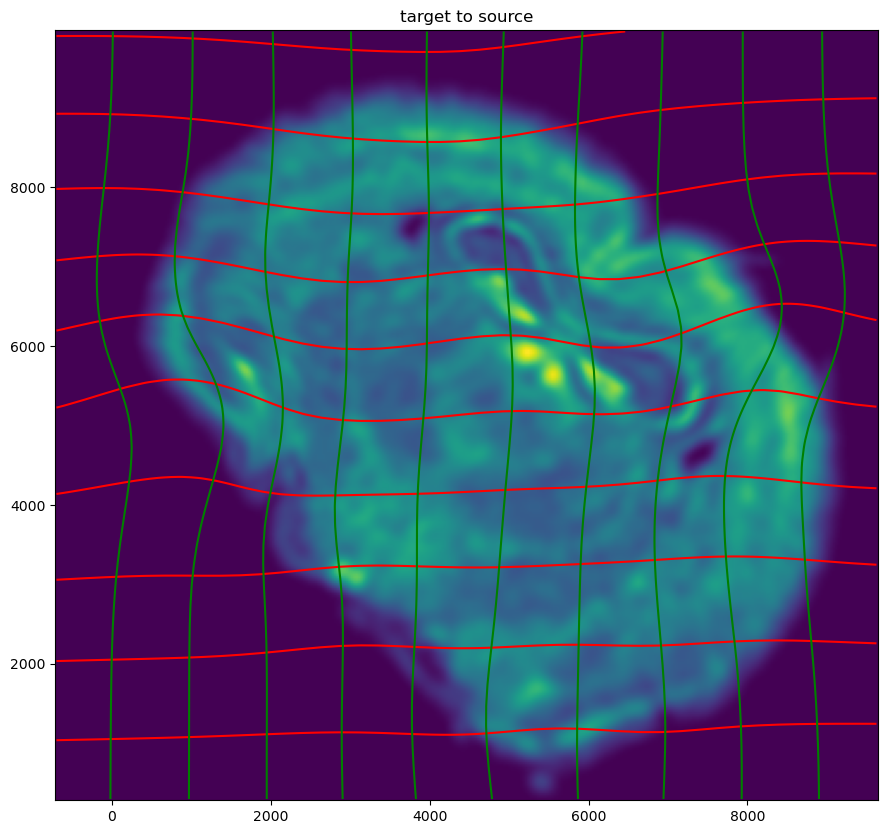

In [68]:
# transform is invertible
phi = STalign.build_transform(xv,v,A,XJ=[YI,XI],direction='f')
# inverse of target image, J 
phiiJ = STalign.transform_image_target_to_source(xv,v,A,[YJ,XJ],J,[YI,XI]) 

#switch tensor from cuda to cpu for plotting with numpy
if phi.is_cuda:
    phi = phi.cpu()
if phiiJ.is_cuda:
    phiiJ = phiiJ.cpu()

# plot with grids
fig,ax = plt.subplots()
levels = np.arange(-100000,100000,1000)
ax.contour(XI,YI,phi[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XI,YI,phi[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('target to source')
ax.imshow(phiiJ.permute(1,2,0)/torch.max(phiiJ),extent=extentI)
ax.invert_yaxis()

Apply STalign transform to the original sets of single-cell centroid positions to achieve their new aligned positions. Already applied the initial affine transformation. 

In [69]:
# apply transform to original points (affine-transformed already!!)
tpointsI= STalign.transform_points_source_to_target(xv,v,A, np.stack([yI_L_T, xI_L_T], 1))

#switch tensor from cuda to cpu for plotting with numpy
if tpointsI.is_cuda:
    tpointsI = tpointsI.cpu()

#switch from row column coordinates (y,x) to (x,y)
xI_LDDMM = tpointsI[:,1]
yI_LDDMM = tpointsI[:,0]

Visualize results: 

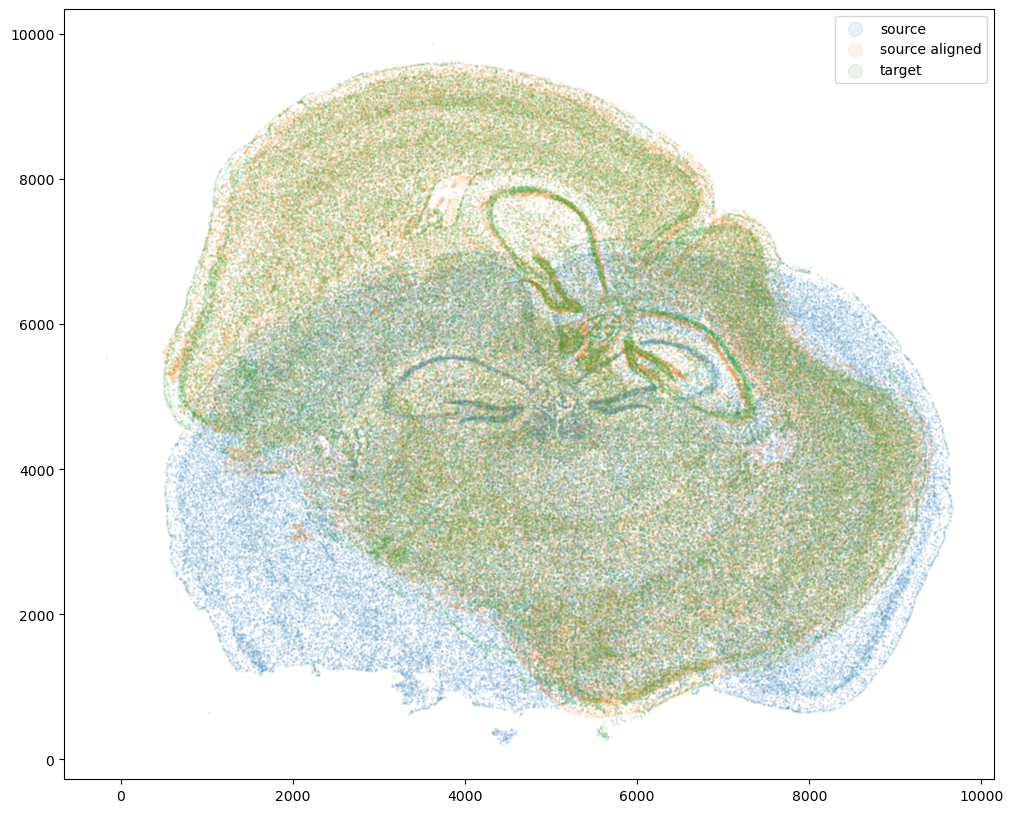

In [70]:
# plot results
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.1, label='source')
ax.scatter(xI_LDDMM,yI_LDDMM,s=1,alpha=0.1, label = 'source aligned')
ax.scatter(xJ,yJ,s=1,alpha=0.1, label='target')
ax.legend(markerscale = 10)

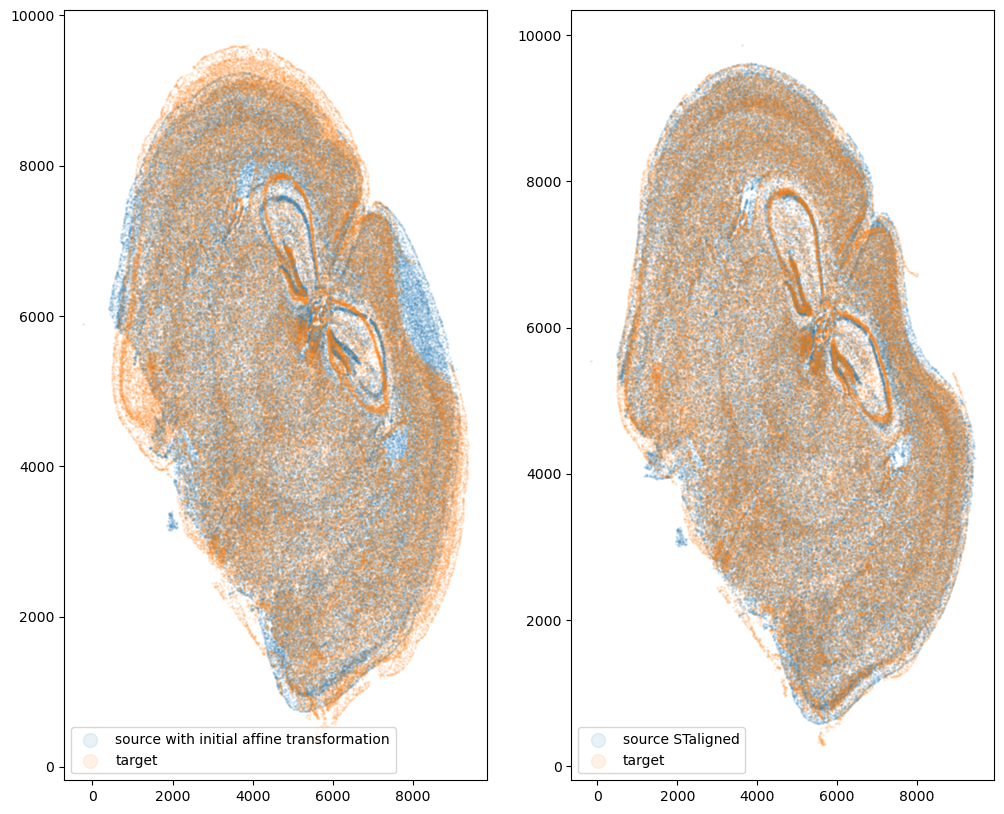

In [71]:
fig,ax = plt.subplots(1,2)
ax[0].scatter(xI_L_T,yI_L_T,s=1,alpha=0.1, label='source with initial affine transformation')
ax[0].scatter(xJ,yJ,s=1,alpha=0.1, label='target')
ax[1].scatter(xI_LDDMM,yI_LDDMM,s=1,alpha=0.1, label = 'source STaligned')
ax[1].scatter(xJ,yJ,s=1,alpha=0.1, label='target')
ax[0].legend(markerscale = 10, loc = 'lower left')
ax[1].legend(markerscale = 10, loc = 'lower left')

Save the new aligned positions by appending to our original data. 

In [72]:
df3 = pd.DataFrame(

    {

        "aligned_x": xI_LDDMM,

        "aligned_y": yI_LDDMM,

    },


)

results = pd.concat([df1, df3], axis=1)
results.head()

Unnamed: 0  fov       volume    center_x   
0  158338042824236264719696604356349910479   33   532.778772  617.916619  \
1  260594727341160372355976405428092853003   33  1004.430016  596.808018   
2  307643940700812339199503248604719950662   33  1267.183208  578.880018   
3   30863303465976316429997331474071348973   33  1403.401822  572.616017   
4  313162718584097621688679244357302162401   33   507.949497  608.364018   

      center_y       min_x       max_x        min_y        max_y    aligned_x   
0  2666.520010  614.725219  621.108019  2657.545209  2675.494810  1072.409961  \
1  2763.450012  589.669218  603.946818  2757.013212  2769.886812  1109.912428   
2  2748.978012  570.877217  586.882818  2740.489211  2757.466812  1088.557174   
3  2766.690012  564.937217  580.294818  2756.581212  2776.798812  1093.635775   
4  2687.418010  603.061218  613.666818  2682.493210  2692.342810  1076.737927   

     aligned_y  
0  7618.526180  
1  7727.380716  
2  7727.036676  
3  7748.726637  
4  7645.783087

In [74]:
results.to_csv('STalign/docs/merfish_data/mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate3_STalign_to_Slice2_Replicate2.csv.gz',
               compression='gzip')